In [1]:
import pandas as pd

iris_data = pd.read_excel("iris.xlsx", header = None)
iris_data

,0,1,2,3,4,5,6
0,5.0,3.3,1.4,0.2,1,0,0
1,6.7,3.1,5.6,2.4,0,0,1
2,6.9,3.1,5.1,2.3,0,0,1
3,4.6,3.6,1.0,0.2,1,0,0
4,6.5,3.0,5.2,2.0,0,0,1
...,...,...,...,...,...,...,...
145,5.5,2.3,4.0,1.3,0,1,0
146,5.4,3.4,1.7,0.2,1,0,0
147,5.8,2.8,5.1,2.4,0,0,1
148,5.3,3.7,1.5,0.2,1,0,0


In [2]:
from sklearn.model_selection import train_test_split

X = iris_data.iloc[:,0:4]
y = iris_data.iloc[:,4:7]
y = y.rename(columns={4:0, 5:1, 6:2})

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105, 3)
(45, 4)
(45, 3)


In [3]:
# normalize the feature variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Self-organizing Maps 

In [17]:
# SOM network with 4 input notes
import numpy as np
input_dimensions = 4

# SOM network with 3 Kohonen neurons. 
# 1-dim. grid of neurons
map_width = 3
#map_height = 1
# Initialize the weight
init_weight = np.random.uniform(size=(map_width,input_dimensions))
print(init_weight)

[[0.82342421 0.92812236 0.80303225 0.54370055]
 [0.59714554 0.77924136 0.13933733 0.18082242]
 [0.1356554  0.85203719 0.5643126  0.68766046]]


In [18]:
import math

radius0 = 3/2
radius = radius0
learning_rate0 = 0.1
learning_rate = learning_rate0
epochs = 1000
J_list = []

weights = init_weight
prev_weight = np.zeros((map_width,input_dimensions))

epoch=0
for epoch in range(0, epochs):
    for train_data in X_train:
        J = np.linalg.norm(init_weight - prev_weight)
        J_list.append(J)
        eu_dis_list = []
        for weight in weights:
            EuSq = (np.square(train_data-weight)).sum()
            eu_dis_list.append(EuSq)
        # find the best matching unit
        min_dis_index = eu_dis_list.index(min(eu_dis_list))
        prev_weight = np.copy(weights)
        for j in range(map_width):
            distance = abs(j - min_dis_index)
            if distance <= radius:
                # update winner weight and its neighbor
                weights[j] = weights[j] + learning_rate*(train_data-weights[j])

    
    # difference between prev_weight and ini_weight
    print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
    print('\tLearning rate: ' + str(learning_rate))
    print('\tNeighbourhood radius: ' + str(radius))
    final_weight = init_weight
    #if J == 0:
        #break
    
    # learning rate descrease linearly
    learning_rate = learning_rate0*(1-(epoch/epochs))
    # Radius decay exponentially
    radius = radius0*math.exp(-epoch/epochs)
    
    epoch+=1

Lower error found: 0.1793782966229671 at epoch: 0
	Learning rate: 0.1
	Neighbourhood radius: 1.5
Lower error found: 0.17919020668375302 at epoch: 1
	Learning rate: 0.1
	Neighbourhood radius: 1.5
Lower error found: 0.17900434534103443 at epoch: 2
	Learning rate: 0.0999
	Neighbourhood radius: 1.4985007497500624
Lower error found: 0.17881898284911463 at epoch: 3
	Learning rate: 0.0998
	Neighbourhood radius: 1.4970029980009996
Lower error found: 0.1786336432106079 at epoch: 4
	Learning rate: 0.09970000000000001
	Neighbourhood radius: 1.4955067432550595
Lower error found: 0.17844832497094162 at epoch: 5
	Learning rate: 0.09960000000000001
	Neighbourhood radius: 1.4940119840159873
Lower error found: 0.17826302812920225 at epoch: 6
	Learning rate: 0.0995
	Neighbourhood radius: 1.4925187187890234
Lower error found: 0.17807775268896625 at epoch: 7
	Learning rate: 0.0994
	Neighbourhood radius: 1.491026946080903
Lower error found: 0.17789249865383164 at epoch: 8
	Learning rate: 0.0993
	Neighbourh

Lower error found: 0.15929274707520208 at epoch: 109
	Learning rate: 0.0892
	Neighbourhood radius: 1.3464413946456524
Lower error found: 0.1591096954649409 at epoch: 110
	Learning rate: 0.08910000000000001
	Neighbourhood radius: 1.3450956262473532
Lower error found: 0.1589266656220812 at epoch: 111
	Learning rate: 0.08900000000000001
	Neighbourhood radius: 1.3437512029447922
Lower error found: 0.1587436575494406 at epoch: 112
	Learning rate: 0.0889
	Neighbourhood radius: 1.3424081233935465
Lower error found: 0.15856067124980788 at epoch: 113
	Learning rate: 0.0888
	Neighbourhood radius: 1.3410663862505359
Lower error found: 0.15837770672594273 at epoch: 114
	Learning rate: 0.0887
	Neighbourhood radius: 1.3397259901740233
Lower error found: 0.15819476398057514 at epoch: 115
	Learning rate: 0.08860000000000001
	Neighbourhood radius: 1.3383869338236125
Lower error found: 0.1580118430164047 at epoch: 116
	Learning rate: 0.08850000000000001
	Neighbourhood radius: 1.337049215860247
Lower err

Lower error found: 0.13876725495766382 at epoch: 222
	Learning rate: 0.07790000000000001
	Neighbourhood radius: 1.202575020435293
Lower error found: 0.13858675651290817 at epoch: 223
	Learning rate: 0.07780000000000001
	Neighbourhood radius: 1.2013730465019887
Lower error found: 0.13840628010278191 at epoch: 224
	Learning rate: 0.0777
	Neighbourhood radius: 1.2001722739418312
Lower error found: 0.13822582572270828 at epoch: 225
	Learning rate: 0.0776
	Neighbourhood radius: 1.1989727015540477
Lower error found: 0.13804539336798377 at epoch: 226
	Learning rate: 0.07750000000000001
	Neighbourhood radius: 1.1977743281390656
Lower error found: 0.13786498303377684 at epoch: 227
	Learning rate: 0.07740000000000001
	Neighbourhood radius: 1.1965771524985114
Lower error found: 0.1376845947151267 at epoch: 228
	Learning rate: 0.07730000000000001
	Neighbourhood radius: 1.1953811734352096
Lower error found: 0.1375042284069421 at epoch: 229
	Learning rate: 0.0772
	Neighbourhood radius: 1.19418638975

Lower error found: 0.11957717411844988 at epoch: 329
	Learning rate: 0.0672
	Neighbourhood radius: 1.080544529557952
Lower error found: 0.11939897519026901 at epoch: 330
	Learning rate: 0.0671
	Neighbourhood radius: 1.0794645251206132
Lower error found: 0.11922079680860158 at epoch: 331
	Learning rate: 0.06699999999999999
	Neighbourhood radius: 1.0783856001478893
Lower error found: 0.11904263894696701 at epoch: 332
	Learning rate: 0.0669
	Neighbourhood radius: 1.0773077535608555
Lower error found: 0.11886450157858759 at epoch: 333
	Learning rate: 0.0668
	Neighbourhood radius: 1.0762309842816649
Lower error found: 0.11868638467638647 at epoch: 334
	Learning rate: 0.06670000000000001
	Neighbourhood radius: 1.0751552912335485
Lower error found: 0.11850828821298555 at epoch: 335
	Learning rate: 0.06659999999999999
	Neighbourhood radius: 1.0740806733408128
Lower error found: 0.11833021216070401 at epoch: 336
	Learning rate: 0.0665
	Neighbourhood radius: 1.07300712952884
Lower error found: 0

Lower error found: 0.029194122545329118 at epoch: 434
	Learning rate: 0.0567
	Neighbourhood radius: 0.9728407377074642
Lower error found: 0.02914280285160865 at epoch: 435
	Learning rate: 0.05660000000000001
	Neighbourhood radius: 0.9718683832280259
Lower error found: 0.029091485469401785 at epoch: 436
	Learning rate: 0.056499999999999995
	Neighbourhood radius: 0.970897000617052
Lower error found: 0.029040170376181097 at epoch: 437
	Learning rate: 0.056400000000000006
	Neighbourhood radius: 0.9699265889031594
Lower error found: 0.02898885754945378 at epoch: 438
	Learning rate: 0.056299999999999996
	Neighbourhood radius: 0.9689571471159368
Lower error found: 0.028937546966762276 at epoch: 439
	Learning rate: 0.05620000000000001
	Neighbourhood radius: 0.9679886742859418
Lower error found: 0.028886238605684476 at epoch: 440
	Learning rate: 0.0561
	Neighbourhood radius: 0.967021169444702
Lower error found: 0.028834932443833745 at epoch: 441
	Learning rate: 0.05600000000000001
	Neighbourhoo

Lower error found: 0.02355817137600321 at epoch: 544
	Learning rate: 0.0457
	Neighbourhood radius: 0.8715039410454029
Lower error found: 0.0235069792724425 at epoch: 545
	Learning rate: 0.0456
	Neighbourhood radius: 0.8706328727111136
Lower error found: 0.023455787242914656 at epoch: 546
	Learning rate: 0.0455
	Neighbourhood radius: 0.8697626750097696
Lower error found: 0.0234045952695941 at epoch: 547
	Learning rate: 0.045399999999999996
	Neighbourhood radius: 0.868893347071173
Lower error found: 0.023353403334705668 at epoch: 548
	Learning rate: 0.0453
	Neighbourhood radius: 0.8680248880259961
Lower error found: 0.02330221142052524 at epoch: 549
	Learning rate: 0.0452
	Neighbourhood radius: 0.8671572970057794
Lower error found: 0.023251019509379228 at epoch: 550
	Learning rate: 0.0451
	Neighbourhood radius: 0.866290573142932
Lower error found: 0.023199827583644785 at epoch: 551
	Learning rate: 0.045
	Neighbourhood radius: 0.86542471557073
Lower error found: 0.02314863562575062 at epo

Lower error found: 0.018026498580561264 at epoch: 652
	Learning rate: 0.0349
	Neighbourhood radius: 0.7822859878802363
Lower error found: 0.01797522250959113 at epoch: 653
	Learning rate: 0.0348
	Neighbourhood radius: 0.7815040929050017
Lower error found: 0.017923944906470805 at epoch: 654
	Learning rate: 0.0347
	Neighbourhood radius: 0.7807229794339248
Lower error found: 0.01787266575958155 at epoch: 655
	Learning rate: 0.0346
	Neighbourhood radius: 0.7799426466858927
Lower error found: 0.017821385057369202 at epoch: 656
	Learning rate: 0.034499999999999996
	Neighbourhood radius: 0.7791630938805723
Lower error found: 0.01777010278834305 at epoch: 657
	Learning rate: 0.0344
	Neighbourhood radius: 0.7783843202384106
Lower error found: 0.017718818941076964 at epoch: 658
	Learning rate: 0.0343
	Neighbourhood radius: 0.7776063249806339
Lower error found: 0.01766753350420898 at epoch: 659
	Learning rate: 0.0342
	Neighbourhood radius: 0.776829107329247
Lower error found: 0.017616246466441443

Lower error found: 0.012477811848696098 at epoch: 760
	Learning rate: 0.0241
	Neighbourhood radius: 0.7022014910221448
Lower error found: 0.012426316746747313 at epoch: 761
	Learning rate: 0.024
	Neighbourhood radius: 0.7014996405148639
Lower error found: 0.012374819246475856 at epoch: 762
	Learning rate: 0.0239
	Neighbourhood radius: 0.7007984915072818
Lower error found: 0.012323319343683728 at epoch: 763
	Learning rate: 0.0238
	Neighbourhood radius: 0.7000980432982498
Lower error found: 0.0122718170342451 at epoch: 764
	Learning rate: 0.0237
	Neighbourhood radius: 0.6993982951873193
Lower error found: 0.012220312314107251 at epoch: 765
	Learning rate: 0.0236
	Neighbourhood radius: 0.6986992464747424
Lower error found: 0.012168805179289591 at epoch: 766
	Learning rate: 0.0235
	Neighbourhood radius: 0.6980008964614701
Lower error found: 0.012117295625884466 at epoch: 767
	Learning rate: 0.0234
	Neighbourhood radius: 0.6973032444491524
Lower error found: 0.012065783650056804 at epoch: 7

Lower error found: 0.0067467224397807155 at epoch: 871
	Learning rate: 0.013000000000000001
	Neighbourhood radius: 0.6284273238714585
Lower error found: 0.0066949518382408545 at epoch: 872
	Learning rate: 0.012900000000000002
	Neighbourhood radius: 0.6277992106565372
Lower error found: 0.006643178824827681 at epoch: 873
	Learning rate: 0.0128
	Neighbourhood radius: 0.627171725240879
Lower error found: 0.006591403403690377 at epoch: 874
	Learning rate: 0.012700000000000001
	Neighbourhood radius: 0.6265448669969982
Lower error found: 0.006539625579059417 at epoch: 875
	Learning rate: 0.0126
	Neighbourhood radius: 0.6259186352980367
Lower error found: 0.006487845355246581 at epoch: 876
	Learning rate: 0.0125
	Neighbourhood radius: 0.6252930295177626
Lower error found: 0.006436062736645336 at epoch: 877
	Learning rate: 0.012400000000000001
	Neighbourhood radius: 0.62466804903057
Lower error found: 0.006384277727731241 at epoch: 878
	Learning rate: 0.0123
	Neighbourhood radius: 0.6240436932

Lower error found: 0.0010390949677811625 at epoch: 981
	Learning rate: 0.0020000000000000018
	Neighbourhood radius: 0.5629666482770994
Lower error found: 0.0009871209494833808 at epoch: 982
	Learning rate: 0.0019000000000000017
	Neighbourhood radius: 0.562403963018342
Lower error found: 0.000935147166518381 at epoch: 983
	Learning rate: 0.0018000000000000017
	Neighbourhood radius: 0.5618418401635947
Lower error found: 0.000883173796326621 at epoch: 984
	Learning rate: 0.0017000000000000016
	Neighbourhood radius: 0.5612802791507342
Lower error found: 0.0008312010343879642 at epoch: 985
	Learning rate: 0.0016000000000000016
	Neighbourhood radius: 0.5607192794181998
Lower error found: 0.0007792290964381449 at epoch: 986
	Learning rate: 0.0015000000000000013
	Neighbourhood radius: 0.5601588404049914
Lower error found: 0.0007272582209925919 at epoch: 987
	Learning rate: 0.0014000000000000013
	Neighbourhood radius: 0.5595989615506701
Lower error found: 0.0006752886722192316 at epoch: 988
	Le

In [19]:
final_weight

array([[ 1.10961662, -0.02128333,  0.95684029,  0.96222523],
       [-0.07753805, -0.98330785,  0.39020615,  0.33341976],
       [-1.01188233,  0.86960991, -1.26641233, -1.22126897]])

In [20]:
# Test on train set

pre_label = []
for train_data in X_train:
    eu_dis_list = []
    for weight in final_weight:
        EuSq = (np.square(train_data-weight)).sum()
        eu_dis_list.append(EuSq)
    # find the best matching unit
    min_dis_index = eu_dis_list.index(min(eu_dis_list))
    pre_label.append(min_dis_index)

In [21]:
y_train_category = y_train.idxmax(axis='columns')
y_train_category

81     1
133    2
137    1
75     0
109    0
      ..
71     1
106    0
14     1
92     0
102    2
Length: 105, dtype: int64

In [22]:
df_plot = pd.DataFrame(X_train)
df_plot.columns = [0, 1, 2, 3]
df_plot["label"] = list(y_train_category)
df_plot["label_pred"] = pre_label
df_plot

,0,1,2,3,label,label_pred
0,-0.432472,-1.398485,0.155320,0.142864,1,1
1,1.802713,-0.686817,1.332228,0.925512,2,0
2,-0.314831,-0.212371,0.211363,0.142864,1,1
3,-0.550113,1.448189,-1.245761,-1.291990,0,2
4,-1.726526,-0.449594,-1.301804,-1.291990,0,2
...,...,...,...,...,...,...
100,0.391017,-0.449594,0.323449,0.142864,1,1
101,-0.432472,2.634304,-1.301804,-1.291990,0,2
102,0.508659,-1.872931,0.379493,0.142864,1,1
103,-0.903037,0.499298,-1.133674,-0.900666,0,2


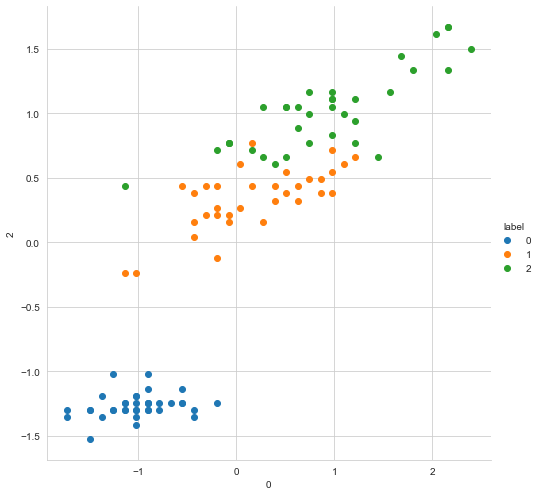

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

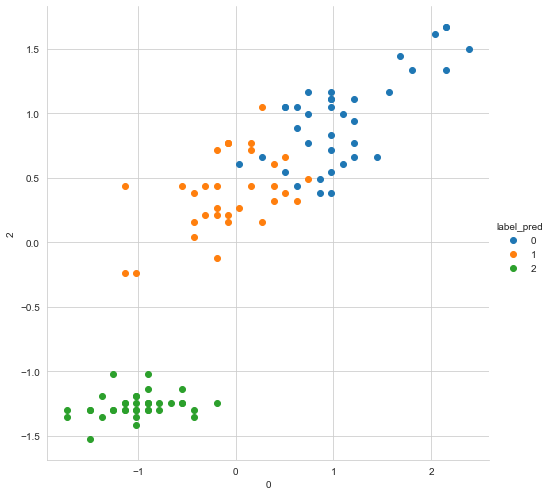

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label_pred",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

In [25]:
# Test on testing set

pre_label = []
for test_data in X_test:
    eu_dis_list = []
    for weight in final_weight:
        EuSq = (np.square(test_data-weight)).sum()
        eu_dis_list.append(EuSq)
    # find the best matching unit
    min_dis_index = eu_dis_list.index(min(eu_dis_list))
    pre_label.append(min_dis_index)

In [26]:
y_test_category = y_test.idxmax(axis='columns')
df_plot = pd.DataFrame(X_test)
df_plot.columns = [0, 1, 2, 3]
df_plot["label"] = list(y_test_category)
df_plot["label_pred"] = pre_label
df_plot

,0,1,2,3,label,label_pred
0,0.155735,-2.110154,0.155320,-0.248460,1,1
1,1.567431,1.210966,1.332228,1.708160,2,0
2,-0.079548,2.159858,-1.413891,-1.291990,0,2
3,-0.550113,1.922635,-1.357847,-1.031108,0,2
4,0.273376,-0.686817,0.547622,0.012423,1,1
5,1.096865,0.262075,1.220141,1.447278,2,0
6,0.155735,-0.212371,0.603666,0.795071,2,1
7,0.273376,-0.449594,0.547622,0.273306,1,1
8,0.155735,0.736521,0.435536,0.534188,1,0
9,-1.608885,-1.872931,-1.357847,-1.161549,0,2


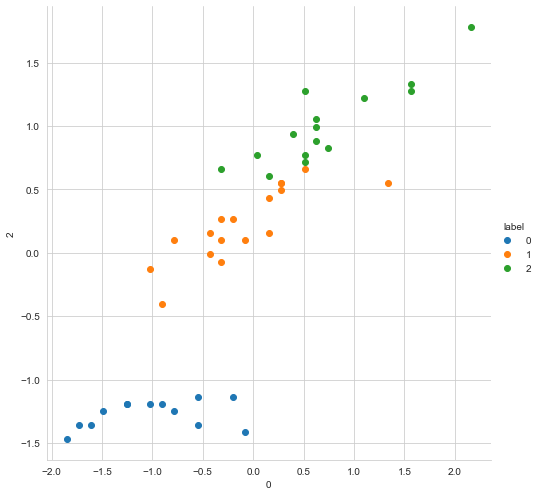

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

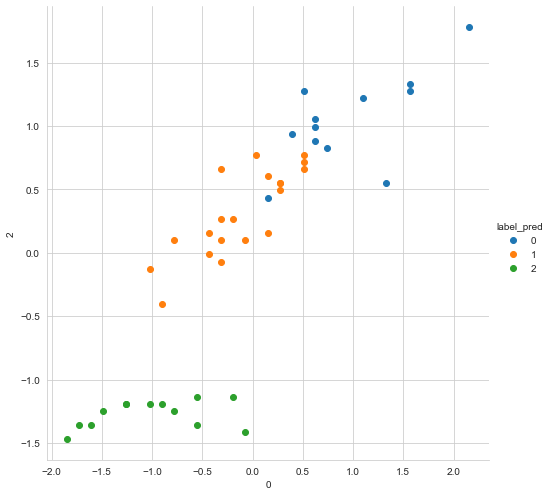

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label_pred",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

# Learning Vector Quantization

In [43]:
# set the number for the input neurons and output neurons

n_input = 4
n_output = 3
learning_rate0 = 0.9
learning_rate = learning_rate0

In [44]:
import random

# Initialize the weights
init_weight = np.random.uniform(size=(n_output,n_input))
print(init_weight)
# Create initialized target for the weights 
targets = []
for i in range(n_output):
    tar_list = [0, 0, 0]
    tar_list[random.randint(0,2)] = 1
    targets.append(tar_list)
print(targets)

[[0.0543483  0.1206658  0.50507706 0.90450841]
 [0.42953238 0.43778342 0.92658518 0.20858922]
 [0.05521377 0.42561883 0.60446022 0.4535648 ]]
[[0, 0, 1], [1, 0, 0], [0, 1, 0]]


In [45]:
print('Number of output neurons: ' + str(n_output))
epochs = 2000

for epoch in range(0, epochs):
    for train_data in X_train:
        # calculate for the clostest node for inputs
        eu_dist_list = []
        for i in range (n_output):
            EuSq = (np.square(train_data-init_weight[i])).sum()
            eu_dist_list.append(EuSq)
        # find the closter node index
        min_dis_index = eu_dist_list.index(min(eu_dist_list))
        # check if T and Cj is equal
        if targets[min_dis_index] == list(np.array(y_train)[min_dis_index]):
            init_weight[min_dis_index] = init_weight[min_dis_index] + learning_rate*(train_data-init_weight[min_dis_index])
        else:
            init_weight[min_dis_index] = init_weight[min_dis_index] - learning_rate*(train_data-init_weight[min_dis_index])
         # difference between prev_weight and ini_weight
    print('\tLearning rate: ' + str(learning_rate))
    final_weight = init_weight
    
    # learning rate descrease linearly
    learning_rate = learning_rate0*(1-(epoch/epochs))
    
    epoch+=1
        
        

Number of output neurons: 3
	Learning rate: 0.9
	Learning rate: 0.9
	Learning rate: 0.8995500000000001
	Learning rate: 0.8991
	Learning rate: 0.8986500000000001
	Learning rate: 0.8982
	Learning rate: 0.89775
	Learning rate: 0.8973
	Learning rate: 0.89685
	Learning rate: 0.8964
	Learning rate: 0.89595
	Learning rate: 0.8955
	Learning rate: 0.89505
	Learning rate: 0.8946000000000001
	Learning rate: 0.8941500000000001
	Learning rate: 0.8937
	Learning rate: 0.8932500000000001
	Learning rate: 0.8928
	Learning rate: 0.8923500000000001
	Learning rate: 0.8919
	Learning rate: 0.8914500000000001
	Learning rate: 0.891
	Learning rate: 0.8905500000000001
	Learning rate: 0.8901
	Learning rate: 0.88965
	Learning rate: 0.8892
	Learning rate: 0.88875
	Learning rate: 0.8883
	Learning rate: 0.88785
	Learning rate: 0.8874
	Learning rate: 0.88695
	Learning rate: 0.8865
	Learning rate: 0.88605
	Learning rate: 0.8856
	Learning rate: 0.8851500000000001
	Learning rate: 0.8847
	Learning rate: 0.8842500000000001

	Learning rate: 0.74385
	Learning rate: 0.7434000000000001
	Learning rate: 0.74295
	Learning rate: 0.7424999999999999
	Learning rate: 0.74205
	Learning rate: 0.7416
	Learning rate: 0.74115
	Learning rate: 0.7407
	Learning rate: 0.7402500000000001
	Learning rate: 0.7398000000000001
	Learning rate: 0.7393500000000001
	Learning rate: 0.7389
	Learning rate: 0.73845
	Learning rate: 0.7380000000000001
	Learning rate: 0.73755
	Learning rate: 0.7371
	Learning rate: 0.73665
	Learning rate: 0.7362000000000001
	Learning rate: 0.73575
	Learning rate: 0.7353
	Learning rate: 0.73485
	Learning rate: 0.7344
	Learning rate: 0.73395
	Learning rate: 0.7334999999999999
	Learning rate: 0.73305
	Learning rate: 0.7326
	Learning rate: 0.73215
	Learning rate: 0.7317
	Learning rate: 0.7312500000000001
	Learning rate: 0.7308000000000001
	Learning rate: 0.73035
	Learning rate: 0.7299
	Learning rate: 0.72945
	Learning rate: 0.7290000000000001
	Learning rate: 0.72855
	Learning rate: 0.7281
	Learning rate: 0.72765
	

	Learning rate: 0.5859000000000001
	Learning rate: 0.5854500000000001
	Learning rate: 0.5850000000000001
	Learning rate: 0.58455
	Learning rate: 0.5841000000000001
	Learning rate: 0.5836500000000001
	Learning rate: 0.5832
	Learning rate: 0.58275
	Learning rate: 0.5823
	Learning rate: 0.5818500000000001
	Learning rate: 0.5814
	Learning rate: 0.58095
	Learning rate: 0.5805
	Learning rate: 0.5800500000000001
	Learning rate: 0.5796
	Learning rate: 0.5791499999999999
	Learning rate: 0.5787
	Learning rate: 0.57825
	Learning rate: 0.5778
	Learning rate: 0.57735
	Learning rate: 0.5769000000000001
	Learning rate: 0.5764500000000001
	Learning rate: 0.5760000000000001
	Learning rate: 0.57555
	Learning rate: 0.5751000000000001
	Learning rate: 0.5746500000000001
	Learning rate: 0.5742
	Learning rate: 0.57375
	Learning rate: 0.5733
	Learning rate: 0.5728500000000001
	Learning rate: 0.5724
	Learning rate: 0.57195
	Learning rate: 0.5715
	Learning rate: 0.5710500000000001
	Learning rate: 0.5706
	Learni

	Learning rate: 0.44730000000000003
	Learning rate: 0.4468500000000001
	Learning rate: 0.4464
	Learning rate: 0.44595000000000007
	Learning rate: 0.4455
	Learning rate: 0.44505000000000006
	Learning rate: 0.4446
	Learning rate: 0.44415000000000004
	Learning rate: 0.4437
	Learning rate: 0.44325000000000003
	Learning rate: 0.4428
	Learning rate: 0.4423500000000001
	Learning rate: 0.4419
	Learning rate: 0.44145000000000006
	Learning rate: 0.441
	Learning rate: 0.44055000000000005
	Learning rate: 0.4401
	Learning rate: 0.43965000000000004
	Learning rate: 0.4392
	Learning rate: 0.43875000000000003
	Learning rate: 0.4383
	Learning rate: 0.4378500000000001
	Learning rate: 0.4374
	Learning rate: 0.43695000000000006
	Learning rate: 0.4365
	Learning rate: 0.43605000000000005
	Learning rate: 0.4356
	Learning rate: 0.43515000000000004
	Learning rate: 0.4347
	Learning rate: 0.43425
	Learning rate: 0.4338
	Learning rate: 0.43335000000000007
	Learning rate: 0.4329
	Learning rate: 0.43245000000000006


	Learning rate: 0.31185
	Learning rate: 0.3114
	Learning rate: 0.31095000000000006
	Learning rate: 0.3105
	Learning rate: 0.31005000000000005
	Learning rate: 0.3096
	Learning rate: 0.30915000000000004
	Learning rate: 0.3087
	Learning rate: 0.30825
	Learning rate: 0.30779999999999996
	Learning rate: 0.30735
	Learning rate: 0.3069
	Learning rate: 0.30645000000000006
	Learning rate: 0.306
	Learning rate: 0.30555000000000004
	Learning rate: 0.3051
	Learning rate: 0.30465000000000003
	Learning rate: 0.30419999999999997
	Learning rate: 0.30375
	Learning rate: 0.30329999999999996
	Learning rate: 0.30285
	Learning rate: 0.3024
	Learning rate: 0.30195000000000005
	Learning rate: 0.3015
	Learning rate: 0.30105000000000004
	Learning rate: 0.3006
	Learning rate: 0.30015000000000003
	Learning rate: 0.29969999999999997
	Learning rate: 0.29925
	Learning rate: 0.29879999999999995
	Learning rate: 0.29835
	Learning rate: 0.2979
	Learning rate: 0.29745000000000005
	Learning rate: 0.297
	Learning rate: 0.

	Learning rate: 0.18449999999999997
	Learning rate: 0.18405000000000002
	Learning rate: 0.18359999999999996
	Learning rate: 0.18315
	Learning rate: 0.18269999999999997
	Learning rate: 0.18225000000000002
	Learning rate: 0.18179999999999996
	Learning rate: 0.18135
	Learning rate: 0.18089999999999998
	Learning rate: 0.18045000000000003
	Learning rate: 0.17999999999999997
	Learning rate: 0.17955000000000002
	Learning rate: 0.17909999999999995
	Learning rate: 0.17865
	Learning rate: 0.17819999999999997
	Learning rate: 0.17775000000000002
	Learning rate: 0.17729999999999996
	Learning rate: 0.17685
	Learning rate: 0.17639999999999997
	Learning rate: 0.17595000000000002
	Learning rate: 0.17549999999999996
	Learning rate: 0.17505
	Learning rate: 0.17459999999999995
	Learning rate: 0.17415
	Learning rate: 0.17369999999999997
	Learning rate: 0.17325000000000002
	Learning rate: 0.17279999999999995
	Learning rate: 0.17235
	Learning rate: 0.17189999999999997
	Learning rate: 0.17145000000000002
	Lea

	Learning rate: 0.06389999999999996
	Learning rate: 0.06345
	Learning rate: 0.06299999999999996
	Learning rate: 0.06255000000000001
	Learning rate: 0.062099999999999954
	Learning rate: 0.06165
	Learning rate: 0.061199999999999956
	Learning rate: 0.060750000000000005
	Learning rate: 0.06029999999999996
	Learning rate: 0.05985000000000001
	Learning rate: 0.05939999999999995
	Learning rate: 0.05895
	Learning rate: 0.058499999999999955
	Learning rate: 0.058050000000000004
	Learning rate: 0.05759999999999995
	Learning rate: 0.05715
	Learning rate: 0.05669999999999995
	Learning rate: 0.05625
	Learning rate: 0.05580000000000005
	Learning rate: 0.05535
	Learning rate: 0.05490000000000005
	Learning rate: 0.05445
	Learning rate: 0.05400000000000005
	Learning rate: 0.05355
	Learning rate: 0.05310000000000005
	Learning rate: 0.052649999999999995
	Learning rate: 0.052200000000000045
	Learning rate: 0.05175
	Learning rate: 0.05130000000000005
	Learning rate: 0.05085
	Learning rate: 0.050400000000000

In [46]:
final_weight

array([[-1.04259125e+00,  7.46281796e+00,  8.64601611e-01,
         4.09909151e+00],
       [-3.48274306e+00,  3.31754026e+00,  7.01934353e+00,
        -3.32355793e-01],
       [-2.76273046e-04,  1.16213728e-03, -1.87187572e-04,
         1.34552769e-03]])

In [47]:
# Test on train set

pre_label_LVQ = []
for train_data in X_train:
    eu_dis_list = []
    for weight in final_weight:
        EuSq = (np.square(train_data-weight)).sum()
        eu_dis_list.append(EuSq)
    # find the predicted label
    min_dis_index = eu_dis_list.index(min(eu_dis_list))
    pre_label_LVQ.append(targets[min_dis_index])

In [48]:
# calculate accuracy
count = 0
for i in range(len(pre_label_LVQ)):
    if pre_label_LVQ[i] == list(y_train.values[i]):
        count += 1
print("Accuracy: ", count/len(pre_label_LVQ))
print("The number of inaccurate labeling: ", (len(pre_label_LVQ)-count))

Accuracy:  0.3142857142857143
The number of inaccurate labeling:  72


In [49]:
df_plot = pd.DataFrame(X_train)
df_plot.columns = [0, 1, 2, 3]
df_LVQ_label = pd.DataFrame(pre_label_LVQ, columns=[0,1,2])
y_train_category = y_train.idxmax(axis='columns')
pre_label_LVQ_category = df_LVQ_label.idxmax(axis='columns')
df_plot["label"] = list(y_train_category)
df_plot["label_pred"] = pre_label_LVQ_category
df_plot

,0,1,2,3,label,label_pred
0,-0.432472,-1.398485,0.155320,0.142864,1,1
1,1.802713,-0.686817,1.332228,0.925512,2,1
2,-0.314831,-0.212371,0.211363,0.142864,1,1
3,-0.550113,1.448189,-1.245761,-1.291990,0,1
4,-1.726526,-0.449594,-1.301804,-1.291990,0,1
...,...,...,...,...,...,...
100,0.391017,-0.449594,0.323449,0.142864,1,1
101,-0.432472,2.634304,-1.301804,-1.291990,0,1
102,0.508659,-1.872931,0.379493,0.142864,1,1
103,-0.903037,0.499298,-1.133674,-0.900666,0,1


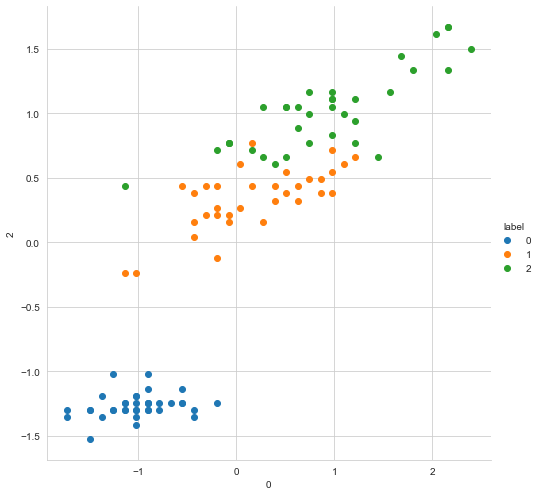

In [50]:
sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

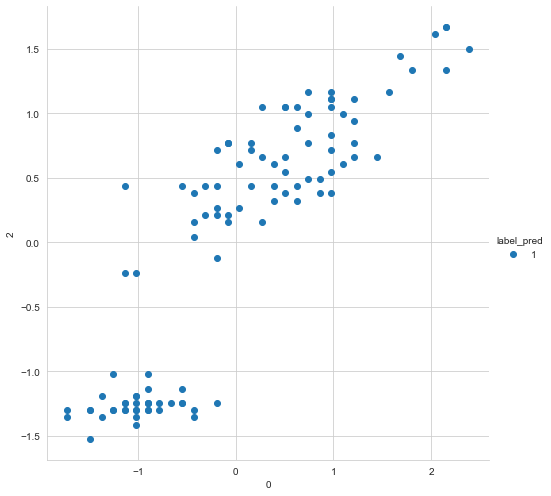

In [51]:
sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label_pred",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

In [52]:
# Test on test set

pre_label_LVQ = []
for test_data in X_test:
    eu_dis_list = []
    for weight in final_weight:
        EuSq = (np.square(test_data-weight)).sum()
        eu_dis_list.append(EuSq)
    # find the predicted label
    min_dis_index = eu_dis_list.index(min(eu_dis_list))
    pre_label_LVQ.append(targets[min_dis_index])

In [53]:
# calculate accuracy
count = 0
for i in range(len(pre_label_LVQ)):
    if pre_label_LVQ[i] == list(y_test.values[i]):
        count += 1
print("Accuracy: ", count/len(pre_label_LVQ))
print("The number of inaccurate labeling: ", (len(pre_label_LVQ)-count))

Accuracy:  0.37777777777777777
The number of inaccurate labeling:  28


In [54]:
df_plot = pd.DataFrame(X_test)
df_plot.columns = [0, 1, 2, 3]
df_LVQ_label = pd.DataFrame(pre_label_LVQ, columns=[0,1,2])
y_test_category = y_test.idxmax(axis='columns')
pre_label_LVQ_category = df_LVQ_label.idxmax(axis='columns')
df_plot["label"] = list(y_test_category)
df_plot["label_pred"] = pre_label_LVQ_category
df_plot

,0,1,2,3,label,label_pred
0,0.155735,-2.110154,0.155320,-0.248460,1,1
1,1.567431,1.210966,1.332228,1.708160,2,1
2,-0.079548,2.159858,-1.413891,-1.291990,0,1
3,-0.550113,1.922635,-1.357847,-1.031108,0,1
4,0.273376,-0.686817,0.547622,0.012423,1,1
5,1.096865,0.262075,1.220141,1.447278,2,1
6,0.155735,-0.212371,0.603666,0.795071,2,1
7,0.273376,-0.449594,0.547622,0.273306,1,1
8,0.155735,0.736521,0.435536,0.534188,1,1
9,-1.608885,-1.872931,-1.357847,-1.161549,0,1


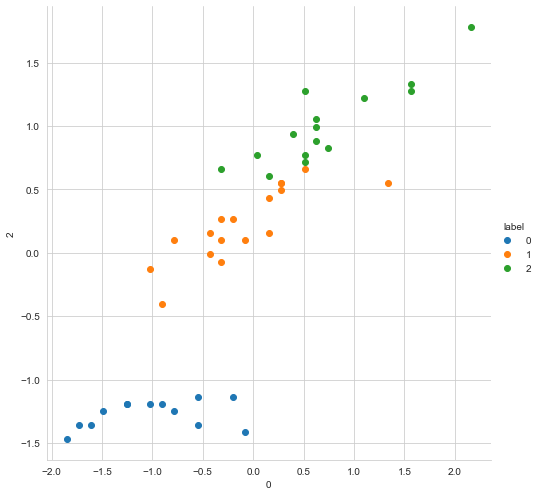

In [55]:
sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()

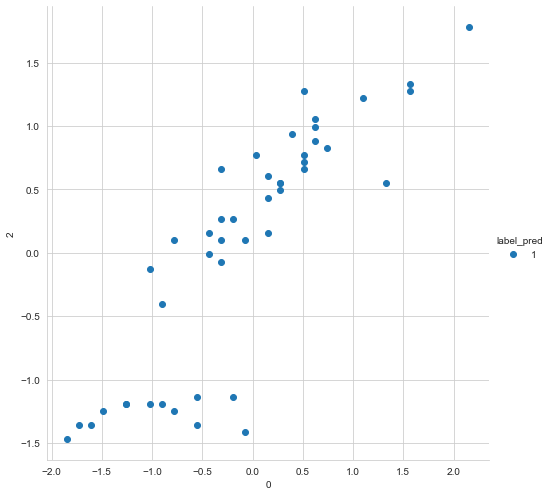

In [56]:
sns.set_style("whitegrid")

sns.FacetGrid(df_plot, hue ="label_pred",
              height = 7).map(plt.scatter,
                              0,
                              2).add_legend()